# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:


# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [4]:
# Create empty lists to append the API data into lists 
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    
    # Try statement to append calls where value is found 
    # Not all calls return data as OpenWeatherMap will not have have records in all the cities generated by CityPy module
    try: 
        response = requests.get(f"{url}&q={city}").json()
        print(f"Processing Record {record} | {city}")
        print(f"{url}&q={city}")
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(1.01)
        
    # If no record found "skip" to next call
    except Exception as e:
        print(str(e))
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=hithadhoo
Processing Record 1 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=hithadhoo
Processing Record 2 | broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=broome
Processing Record 2 | Broome
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=broome
Processing Record 3 | albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=albany
Processing Record 3 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=albany
Processing Record 4 | port alfred
http://api.openweathermap.org/data/2.5/weather?units=Imperial&A

Processing Record 29 | addi ugri
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=addi ugri
'name'
City not found. Skipping...
Processing Record 29 | kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kaeo
Processing Record 29 | Kaeo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kaeo
Processing Record 30 | nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=nemuro
Processing Record 30 | Nemuro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=nemuro
Processing Record 31 | mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mar del plata
Processing Record 31 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c

Processing Record 53 | port moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=port moresby
Processing Record 53 | Port Moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=port moresby
Processing Record 54 | waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=waddan
Processing Record 54 | Waddan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=waddan
Processing Record 55 | attawapiskat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=attawapiskat
'name'
City not found. Skipping...
Processing Record 55 | kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kidal
Processing Record 55 | Kidal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&

Processing Record 80 | bengkulu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=bengkulu
'name'
City not found. Skipping...
Processing Record 80 | coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=coquimbo
Processing Record 80 | Coquimbo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=coquimbo
Processing Record 81 | illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=illoqqortoormiut
'name'
City not found. Skipping...
Processing Record 81 | beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=beira
Processing Record 81 | Beira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=beira
Processing Record 82 | umm kaddadah
http://api.openweathermap.

Processing Record 105 | rovaniemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=rovaniemi
Processing Record 105 | Rovaniemi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=rovaniemi
Processing Record 106 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=pisco
Processing Record 106 | Pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=pisco
Processing Record 107 | tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=tromso
Processing Record 107 | Tromso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=tromso
Processing Record 108 | bud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=bud
Processing 

Processing Record 132 | vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=vila velha
Processing Record 132 | Vila Velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=vila velha
Processing Record 133 | vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=vestmanna
Processing Record 133 | Vestmanna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=vestmanna
Processing Record 134 | dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=dikson
Processing Record 134 | Dikson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=dikson
Processing Record 135 | nerchinskiy zavod
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f94

Processing Record 160 | abu samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=abu samrah
Processing Record 160 | Abu Samrah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=abu samrah
Processing Record 161 | bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=bandarbeyla
Processing Record 161 | Bandarbeyla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=bandarbeyla
Processing Record 162 | malanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=malanje
Processing Record 162 | Malanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=malanje
Processing Record 163 | atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548

Processing Record 188 | ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=ancud
Processing Record 188 | Ancud
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=ancud
Processing Record 189 | ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=ahuimanu
Processing Record 189 | Ahuimanu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=ahuimanu
Processing Record 190 | wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=wanning
Processing Record 190 | Wanning
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=wanning
Processing Record 191 | lebu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lebu
Processin

Processing Record 217 | lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lagoa
Processing Record 217 | Lagoa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lagoa
Processing Record 218 | kysyl-syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kysyl-syr
Processing Record 218 | Kysyl-Syr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kysyl-syr
Processing Record 219 | gairo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=gairo
Processing Record 219 | Gairo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=gairo
Processing Record 220 | caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=caravelas
Pro

Processing Record 244 | bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=bereda
Processing Record 244 | Bereda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=bereda
Processing Record 245 | mendi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mendi
Processing Record 245 | Mendi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mendi
Processing Record 246 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=sobolevo
Processing Record 246 | Sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=sobolevo
Processing Record 247 | chuzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=chuzhou
Process

Processing Record 270 | chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=chapais
Processing Record 270 | Chapais
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=chapais
Processing Record 271 | labrea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=labrea
'name'
City not found. Skipping...
Processing Record 271 | mossendjo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mossendjo
Processing Record 271 | Mossendjo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mossendjo
Processing Record 272 | karaton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=karaton
Processing Record 272 | Karaton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3

Processing Record 296 | lidkoping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lidkoping
Processing Record 296 | Lidkoping
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lidkoping
Processing Record 297 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kamenka
Processing Record 297 | Kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kamenka
Processing Record 298 | hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=hami
Processing Record 298 | Hami
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=hami
Processing Record 299 | siculeni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=siculeni
P

Processing Record 322 | salmas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=salmas
Processing Record 322 | Salmas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=salmas
Processing Record 323 | sao joao do piaui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=sao joao do piaui
Processing Record 323 | Sao Joao do Piaui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=sao joao do piaui
Processing Record 324 | shediac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=shediac
Processing Record 324 | Shediac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=shediac
Processing Record 325 | surgut
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795

Processing Record 350 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mys shmidta
'name'
City not found. Skipping...
Processing Record 350 | phan thiet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=phan thiet
Processing Record 350 | Phan Thiet
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=phan thiet
Processing Record 351 | rogovatoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=rogovatoye
Processing Record 351 | Rogovatoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=rogovatoye
Processing Record 352 | marina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=marina
Processing Record 352 | Marina
http://api.openweathermap.org/data/2.5/weather

Processing Record 377 | mubi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mubi
Processing Record 377 | Mubi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mubi
Processing Record 378 | mikhaylovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mikhaylovka
Processing Record 378 | Mikhaylovka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=mikhaylovka
Processing Record 379 | poronaysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=poronaysk
Processing Record 379 | Poronaysk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=poronaysk
Processing Record 380 | scalea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56

Processing Record 404 | dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=dudinka
Processing Record 404 | Dudinka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=dudinka
Processing Record 405 | chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=chara
Processing Record 405 | Chara
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=chara
Processing Record 406 | kharan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kharan
Processing Record 406 | Kharan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kharan
Processing Record 407 | sabzevar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=sabzevar
Processin

Processing Record 432 | oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=oktyabrskiy
Processing Record 432 | Oktyabrskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=oktyabrskiy
Processing Record 433 | almeirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=almeirim
Processing Record 433 | Almeirim
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=almeirim
Processing Record 434 | lahij
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lahij
Processing Record 434 | Lahij
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lahij
Processing Record 435 | naryan-mar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c3

Processing Record 459 | kotma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kotma
Processing Record 459 | Kotma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kotma
Processing Record 460 | vreed en hoop
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=vreed en hoop
'name'
City not found. Skipping...
Processing Record 460 | tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=tilichiki
Processing Record 460 | Tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=tilichiki
Processing Record 461 | healdsburg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=healdsburg
Processing Record 461 | Healdsburg
http://api.openweathermap.org/data/2.5/weather?units=I

Processing Record 486 | inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=inta
Processing Record 486 | Inta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=inta
Processing Record 487 | solsona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=solsona
Processing Record 487 | Solsona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=solsona
Processing Record 488 | lembang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lembang
Processing Record 488 | Lembang
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lembang
Processing Record 489 | saleaula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=saleaula
'name'
Ci

Processing Record 512 | muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=muros
Processing Record 512 | Muros
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=muros
Processing Record 513 | lagdo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lagdo
Processing Record 513 | Lagdo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=lagdo
Processing Record 514 | le havre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=le havre
Processing Record 514 | Le Havre
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=le havre
Processing Record 515 | kiruna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=kiruna
Processing Re

Processing Record 541 | sirjan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=sirjan
Processing Record 541 | Sirjan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=sirjan
Processing Record 542 | shenxian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=shenxian
Processing Record 542 | Shenxian
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=shenxian
Processing Record 543 | bur gabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=bur gabo
'name'
City not found. Skipping...
Processing Record 543 | boa vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=boa vista
Processing Record 543 | Boa Vista
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID

Processing Record 567 | gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=gat
Processing Record 567 | Gat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=gat
Processing Record 568 | tsentralnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=tsentralnyy
'name'
City not found. Skipping...
Processing Record 568 | taksimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=taksimo
Processing Record 568 | Taksimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=taksimo
Processing Record 569 | tumbes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451e0b8650c33b56e&q=tumbes
Processing Record 569 | Tumbes
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3a31795c9c548f9451

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dictonary with the lists generated
weatherpy_dict = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dict)

# Display count of weather data values 
weather_data.count()

City          569
Cloudiness    569
Country       569
Date          569
Humidity      569
Lat           569
Lng           569
Max Temp      569
Wind Speed    569
dtype: int64

In [6]:
# Save data frame to CSV
weather_data.to_csv('Output/weather_data.csv')

# Display data frame head 
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hithadhoo,100,MV,1566673125,68,-0.60,73.08,83.29,8.72
1,Broome,0,GB,1566673127,68,52.47,1.45,78.80,5.82
2,Albany,40,US,1566673025,53,42.65,-73.75,75.00,12.75
3,Port Alfred,0,ZA,1566673129,78,-33.59,26.89,63.00,3.00
4,Qaanaaq,94,GL,1566673130,62,77.48,-69.36,37.57,27.38


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

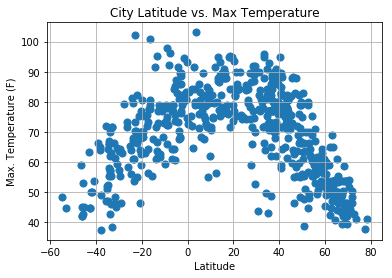

In [16]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

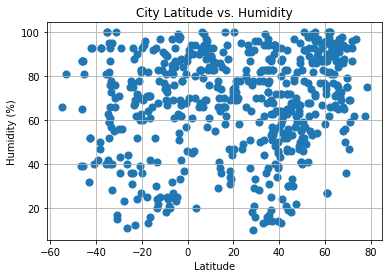

In [15]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Humidity_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

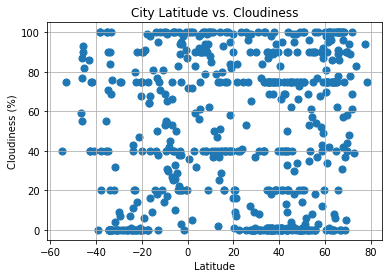

In [14]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

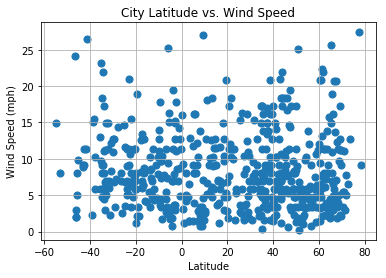

In [12]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=50)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()